In [31]:
import os
import random
import json

image_folder = r"datasets/cp/images/val/"
json_predict_path = "predict.json"
json_ground_truth_path = "custom_val_full_binary.json"

# choose random picture
image_names = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        # path = os.path.join(root, file)
        image_names.append(file)

print(len(image_names))

random_index = random.randint(0, len(image_names))
target_name = image_names[random_index]
print(f"index(not id)={random_index}, name={target_name}")

500
index(not id)=260, name=frankfurt_000001_080391_leftImg8bit.png


In [32]:
# find predictions
with open(json_predict_path, "r") as open_f:
    dicts_predict = json.load(open_f)

# print(dicts['annotations'])

anno_array_predict = dicts_predict["annotations"]
boxes_predict = []
labels__predict = []
for item in anno_array_predict:
    if item["im_name"] == target_name:
        print(f"found box: im_id={item['image_id']}, label={item['category_id']}")
        boxes_predict.append(item["bbox"])
        labels__predict.append(item["category_id"])

print(boxes_predict)

found box: im_id=261, label=0
found box: im_id=261, label=0
[[694, 325, 44, 107], [1692, 320, 19, 33]]


In [33]:
# find ground truth
with open(json_ground_truth_path, "r") as open_f:
    dicts_gt = json.load(open_f)

# print(dicts['annotations'])

image_array_gt = dicts_gt["images"]
print(len(image_array_gt))
image_id_gt = -1
for item in image_array_gt:
    # print(item["file_name"], target_name)
    if item["file_name"] == target_name:
        image_id_gt = item["id"]
        break
if image_id_gt == -1:
    print(f"ERROR! not found image with name {target_name} in gt!")

anno_array_gt = dicts_gt["annotations"]
print(len(anno_array_gt))
boxes_gt = []
labels_gt = []
for item in anno_array_gt:
    if item["image_id"] == image_id_gt:
        print(f"found box: im_id={item['image_id']}, label={item['category_id']}")
        boxes_gt.append(item["bbox"])
        labels_gt.append(item["category_id"])

print(boxes_gt)

500
5795
found box: im_id=260, label=1
found box: im_id=260, label=1
found box: im_id=260, label=1
found box: im_id=260, label=1
found box: im_id=260, label=1
found box: im_id=260, label=1
found box: im_id=260, label=1
found box: im_id=260, label=1
found box: im_id=260, label=1
[[1461, 352, 12, 31], [993, 353, 17, 42], [968, 350, 22, 52], [927, 356, 21, 50], [696, 326, 43, 105], [837, 313, 20, 80], [887, 312, 17, 83], [728, 314, 9, 17], [741, 288, 7, 92]]


9 9


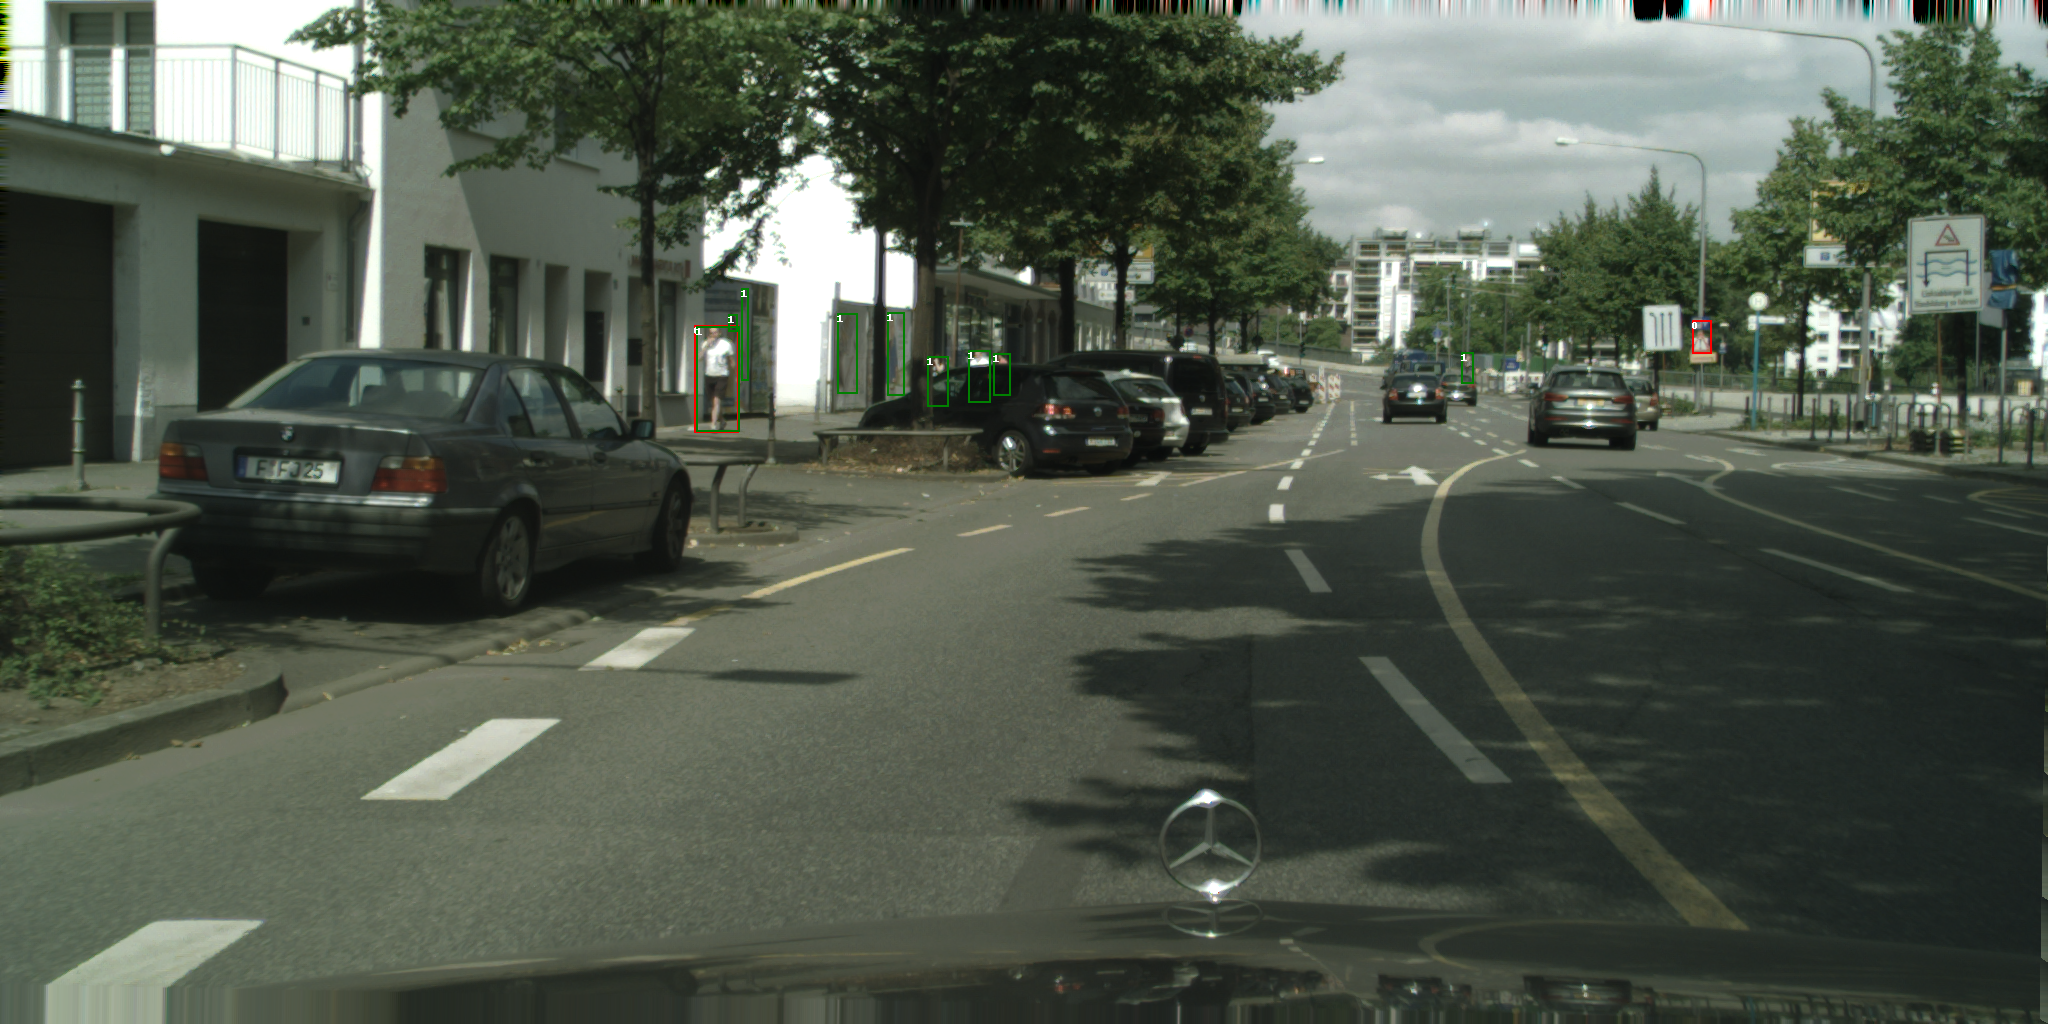

In [34]:
from PIL import Image, ImageDraw

# import datasets.transforms as T

image = Image.open(image_folder + target_name).convert("RGB")  # load image

draw = ImageDraw.Draw(image, "RGB")

print(len(boxes_gt), len(boxes_gt))

for box, label in zip(boxes_predict, labels__predict):
    x, y, w, h = tuple(box)
    # print(x, y, w, h)
    # print(image.width, image.height)
    [x0, y0, x1, y1] = [x, y, x + w, y + h]
    draw.rectangle([x0, y0, x1, y1], outline="red", width=2)
    draw.text((x0, y0), str(label), fill=(255, 255, 255, 128))
    # draw.text((x, y), id2label[class_idx], fill='white')

for box, label in zip(boxes_gt, labels_gt):
    x, y, w, h = tuple(box)
    # print(x, y, w, h)
    # print(image.width, image.height)
    [x0, y0, x1, y1] = [x, y, x + w, y + h]
    # [x0,y0,x1,y1] = [(x - 0.5 * w), (y - 0.5 * h), (x + 0.5 * w), (y + 0.5 * h)]
    draw.rectangle([x0, y0, x1, y1], outline="green", width=2)
    draw.text((x0, y0), str(label), fill=(255, 255, 255, 128))

image